In [85]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv("GOOG.csv")
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019","1,259.11","1,259.11","1,262.90","1,252.35",1.01M
1,"Oct 23, 2019","1,257.63","1,240.21","1,258.04","1,240.21",1.18M
2,"Oct 22, 2019","1,241.20","1,244.48","1,248.73","1,239.85",1.28M
3,"Oct 21, 2019","1,244.28","1,248.70","1,253.51","1,239.99",1.03M
4,"Oct 18, 2019","1,244.41","1,254.69","1,258.11","1,240.14",1.58M


In [87]:
df.columns

Index(['Date', 'Close Price', 'Open Price', 'High Price', 'Low Price',
       'Total Traded Quantity'],
      dtype='object')

In [88]:
df.describe()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
count,503,503,503,503,503,503
unique,503,496,494,492,492,229
top,"Jul 01, 2019","1,199.10","1,188.00","1,088.00","1,042.00",1.77M
freq,1,2,2,3,2,10


In [89]:
df.shape
df['Total Traded Quantity'].value_counts()

1.77M    10
1.43M     9
1.58M     8
1.66M     7
1.72M     7
         ..
3.72M     1
3.18M     1
2.74M     1
1.00M     1
1.90M     1
Name: Total Traded Quantity, Length: 229, dtype: int64

In [90]:
df['Close Price'] = df['Close Price'].str.replace(',','').astype('float64')

In [91]:
df['Total Traded Quantity'].head()

0    1.01M
1    1.18M
2    1.28M
3    1.03M
4    1.58M
Name: Total Traded Quantity, dtype: object

In [92]:
df['Total Traded Quantity'] = df['Total Traded Quantity'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [93]:
i = df['Close Price'].iloc[:90]
max_price = i.max()
min_price = i.min()
mean_price = i.mean()
print(max_price, min_price, mean_price)

1259.11 1076.63 1184.4741111111111


In [94]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date'].max() - df['Date'].min()

Timedelta('729 days 00:00:00')

In [95]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year
0,2019-10-24,1259.11,"1,259.11","1,262.90","1,252.35",1010000,10,2019
1,2019-10-23,1257.63,"1,240.21","1,258.04","1,240.21",1180000,10,2019
2,2019-10-22,1241.20,"1,244.48","1,248.73","1,239.85",1280000,10,2019
3,2019-10-21,1244.28,"1,248.70","1,253.51","1,239.99",1030000,10,2019
4,2019-10-18,1244.41,"1,254.69","1,258.11","1,240.14",1580000,10,2019


VWAP stands for Volume Weighted Average Price. It is a measure of the average price at which a stock is trading over the trading horizon. It is calculated by multiplying the price of the stock with the total volume or the total traded quantity of the stock and then dividing the whole by the total traded quantity. 

In [96]:
def vwap(df):
    q = df['Close Price']
    p = df['Total Traded Quantity']
    return df.assign(vwap=(p * q).cumsum() / q.cumsum())

df = df.groupby(['Month','Year'], group_keys=False).apply(vwap)
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,vwap
436,2018-01-31,1182.22,"1,183.81","1,186.32","1,172.10",1800000,1,2018,1.800000e+06
437,2018-01-30,1177.37,"1,177.72","1,187.93","1,174.51",1870000,1,2018,1.834928e+06
438,2018-01-29,1186.48,"1,188.00","1,198.00","1,184.06",1570000,1,2018,1.746286e+06
439,2018-01-26,1187.56,"1,187.53","1,187.56","1,168.03",2110000,1,2018,1.837533e+06
440,2018-01-25,1182.14,"1,180.71","1,185.00","1,171.84",1500000,1,2018,1.770085e+06


The below function is to calculate the average closing price of the stock for N number of days. The average price has been calculated for 1 week, 2 weeks, 1 month, 3 months, 6 months and 1 year respectively.

In [97]:
def avg(N):
    avg_price = df['Close Price'].iloc[:N].mean()
    return avg_price

In [98]:
avg_1 = avg(7)
avg_2 = avg(14)
avg_3 = avg(30)
avg_4 = avg(90)
avg_5 = avg(180)
avg_6 = avg(365)

In [99]:
print('Average Price in : ')
print('1 week :', format(avg_1))
print('2 week :', format(avg_2))
print('1 month :', format(avg_3))
print('3 month :', format(avg_4))
print('6 month :', format(avg_5))
print('1 year :', format(avg_6))

Average Price in : 
1 week : 1180.4614285714285
2 week : 1158.5257142857142
1 month : 1125.231
3 month : 1103.2
6 month : 1120.0258333333334
1 year : 1144.7263835616438


The below function is to calculate the profit or loss for the N number of days. The profit/ loss has been calculated for 1 week, 2 weeks, 1 month, 3 months, 6 months and 1 year respectively.

In [100]:
def pl(N):
    per = ((df['Close Price'].iloc[N] - df['Close Price'].iloc[0])/df['Close Price'].iloc[N])*100
    return per

In [101]:
per_1 = pl(7)
per_2 = pl(14)
per_3 = pl(30)
per_4 = pl(90)
per_5 = pl(120)
per_6 = pl(365)

In [102]:
print('Profit or Loss in : ')
print('1 week :', format(per_1))
print('2 week :', format(per_2))
print('1 month :', format(per_3))
print('3 month :', format(per_4))
print('6 month :', format(per_5))
print('1 year :', format(per_6))

Profit or Loss in : 
1 week : -1.551333150082458
2 week : -6.492874772551202
1 month : -7.560593929689219
3 month : -2.7472384213591163
6 month : -2.4969221965979393
1 year : 3.875174813802979


Next the trends of the stock is observed based on the daily returns i.e. daily percentage change in closing price of the stock. The trends are analyzed based on the following conditions :-
<br> 1. If the daily returns are between -0.5 and 0.5 that means very slight change or no change
<br> 2. If the daily returns are between 0.5 and 1 that means slight change on the positive side
<br> 3. If the daily returns are between -1 and -0.5 that means slight change on the negative side
<br> 4. If the daily returns are between 1 and 3 that means change on the positive side
<br> 5. If the daily returns are between -3 and -1 that means change on the negative side
<br> 6. If the daily returns are between 3 and 7 that means top gains
<br> 7. If the daily returns are between -3 and -7 that means top losses
<br> 8. If the daily returns are greater than 7 that means **bull run** (stock prices are on rise)
<br> 9. If the daily returns are lesser than  -7 that means **bear drop** (stock prices are on decline)
<br><br> **Overview of bear and bull markets** : The words bull and bear market are used to explain how financial prices usually do — whether or not they increase or depreciate in value. At the same time , given that the economy is driven by the behavior of consumers, these words often reflect how investors feel about the business and the patterns that follow.

In [103]:
df['Day_Perc_Change'] = df['Close Price'].pct_change(1)*100

In [104]:
def change(df):
    if (df['Day_Perc_Change'] > -0.5) and (df['Day_Perc_Change'] < 0.5):
        return 'Slight or No Change'
    elif (df['Day_Perc_Change'] > 0.5) and (df['Day_Perc_Change'] < 1):
        return 'Slight positive'
    elif (df['Day_Perc_Change'] > -1) and (df['Day_Perc_Change'] < -0.5):
        return 'Slight negative'
    elif (df['Day_Perc_Change'] > 1) and (df['Day_Perc_Change'] < 3):
        return 'Positive'
    elif (df['Day_Perc_Change'] > -3) and (df['Day_Perc_Change'] < -1):
        return 'Negative'
    elif (df['Day_Perc_Change'] > 3) and (df['Day_Perc_Change'] < 7):
        return 'Among top gainers'
    elif (df['Day_Perc_Change'] > -7) and (df['Day_Perc_Change'] < -3):
        return 'Among top losers'
    elif (df['Day_Perc_Change'] > 7):
        return 'Bull run'
    elif (df['Day_Perc_Change'] < -7):
        return 'Bear drop'

df['Trend'] = df.apply(change, axis = 1)

In [105]:
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,vwap,Day_Perc_Change,Trend
436,2018-01-31,1182.22,"1,183.81","1,186.32","1,172.10",1800000,1,2018,1.800000e+06,NaN,None
437,2018-01-30,1177.37,"1,177.72","1,187.93","1,174.51",1870000,1,2018,1.834928e+06,-0.410245,Slight or No Change
438,2018-01-29,1186.48,"1,188.00","1,198.00","1,184.06",1570000,1,2018,1.746286e+06,0.773758,Slight positive
439,2018-01-26,1187.56,"1,187.53","1,187.56","1,168.03",2110000,1,2018,1.837533e+06,0.091026,Slight or No Change
440,2018-01-25,1182.14,"1,180.71","1,185.00","1,171.84",1500000,1,2018,1.770085e+06,-0.456398,Slight or No Change


In [106]:
df['Total Traded Quantity'].groupby(df.Trend, group_keys=False).mean()

Trend
Among top gainers      2.607178e+06
Among top losers       2.052966e+06
Bear drop              2.611667e+06
Bull run               3.243333e+06
Negative               1.719459e+06
Positive               1.782168e+06
Slight negative        1.712321e+06
Slight or No Change    1.678809e+06
Slight positive        1.720406e+06
Name: Total Traded Quantity, dtype: float64

In [107]:
df['Total Traded Quantity'].groupby(df.Trend, group_keys=False).median()

Trend
Among top gainers      2415000
Among top losers       1750000
Bear drop              2495000
Bull run               2835000
Negative               1495000
Positive               1665000
Slight negative        1490000
Slight or No Change    1570000
Slight positive        1450000
Name: Total Traded Quantity, dtype: int32

In [108]:
df.index = df['Date']
df.sort_index(inplace = True)
del df['Date']

In [109]:
df.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,vwap,Day_Perc_Change,Trend
Date,,,,,,,,,,
2017-10-25,991.46,986.27,994.43,977.72,1530000,10,2017,2.598757e+06,0.004035,Slight or No Change
2017-10-26,991.42,998.47,"1,006.51",990.47,2370000,10,2017,2.857756e+06,-4.087378,Among top losers
2017-10-27,1033.67,"1,030.99","1,063.62","1,026.85",5180000,10,2017,3.013754e+06,0.052268,Slight or No Change
2017-10-30,1033.13,"1,029.16","1,039.83","1,022.33",2340000,10,2017,1.930018e+06,0.008712,Slight or No Change
2017-10-31,1033.04,"1,033.00","1,041.00","1,026.30",1520000,10,2017,1.520000e+06,-11.672011,Bear drop


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

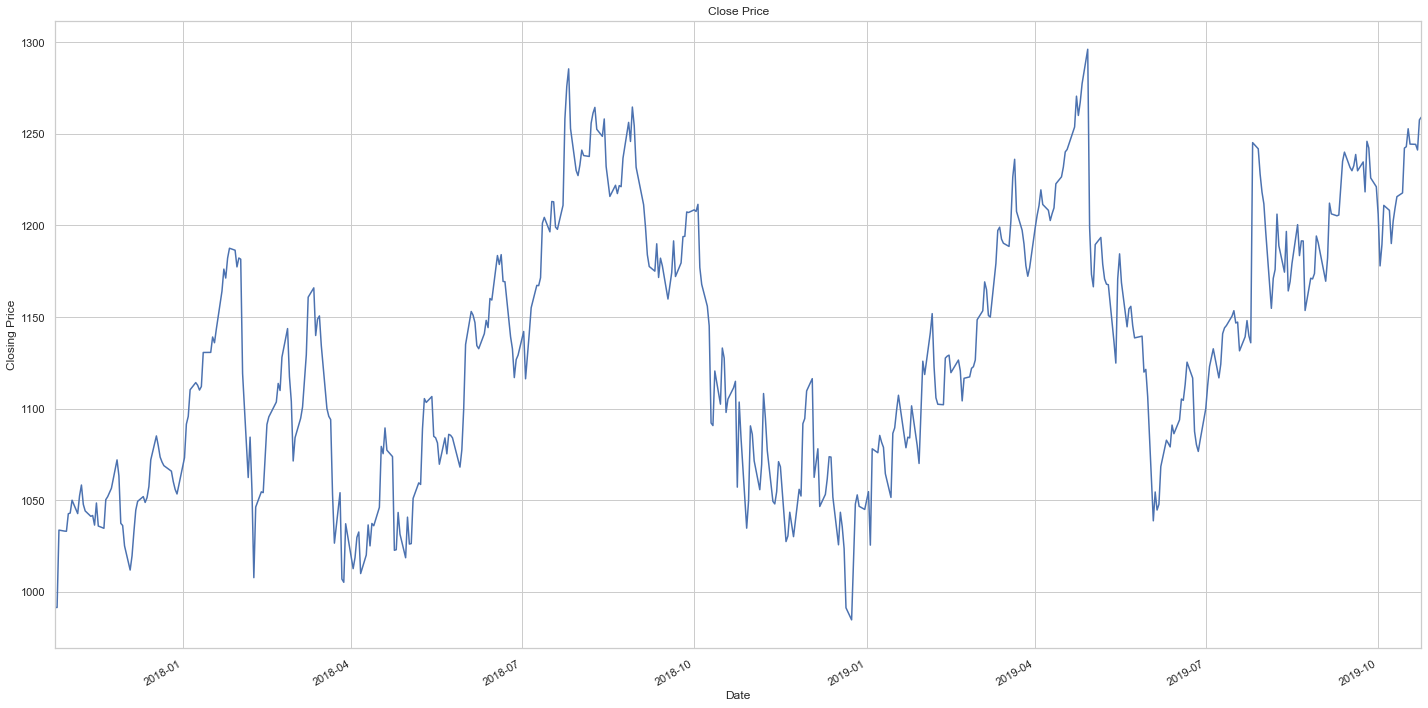

In [111]:
plt.figure(figsize=(20, 10))
df['Close Price'].plot(kind = 'line')
plt.title('Close Price')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

The above graph plots the closing price for the entire time frame of the stock. It displays the when the closing price of the stock was the highest which is around August 2018 and when the closing price was the lowest which is around December 2018. It gives an approximate idea about how the closing the price of the stock is varying over the time.

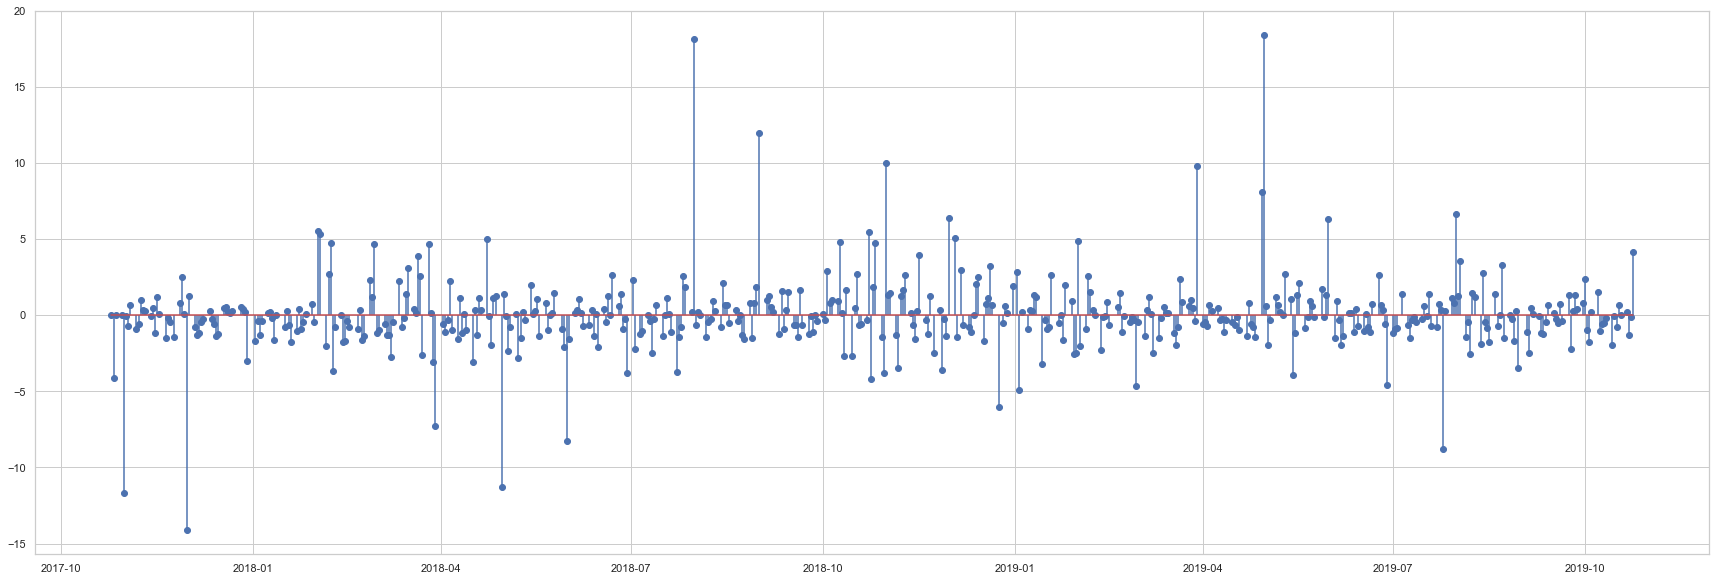

In [112]:
plt.figure(figsize=(30, 10))
plt.stem(df.index, df['Day_Perc_Change'], use_line_collection=True)
plt.show()

The above graph is a stem plot which is a discrete series plot. Stem plot is kind of similar to histogram. It helps to gain insights from the dataset and highlighting the outliers in the dataset. The daily returns of the closing price of the stock are plotted over the time.  

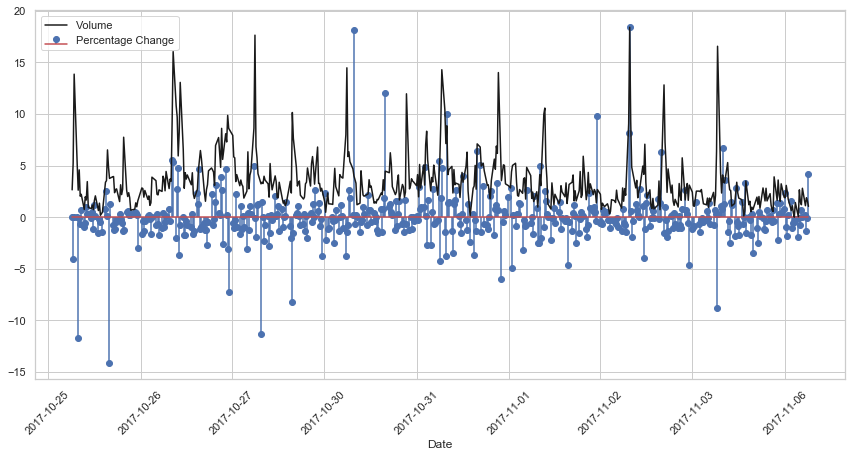

In [113]:
scaledvolume =  df["Total Traded Quantity"] - df["Total Traded Quantity"].min()
scaledvolume = scaledvolume/scaledvolume.max() * df.Day_Perc_Change.max()

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(df.index, df.Day_Perc_Change , 'b', markerfmt='bo', label='Percentage Change', use_line_collection = True)
ax.plot(df.index, scaledvolume, 'k', label='Volume')

ax.set_xlabel('Date')
plt.legend(loc=2)

plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.show()

The above graph plots the total traded quantity of the stock for the entire timeframe over the stem plot of daily returns. It helps to derive a relation between the daily returns of the stocks and the total traded quantity. As it is visible in the plot, the total traded quantity usually increases when the daily returns are high indicating a positive relationship but it not always true in some parts.

In [114]:
df['Trend'].value_counts()

Slight or No Change    165
Negative               100
Positive                80
Slight negative         63
Slight positive         42
Among top gainers       22
Among top losers        18
Bull run                 6
Bear drop                6
Name: Trend, dtype: int64

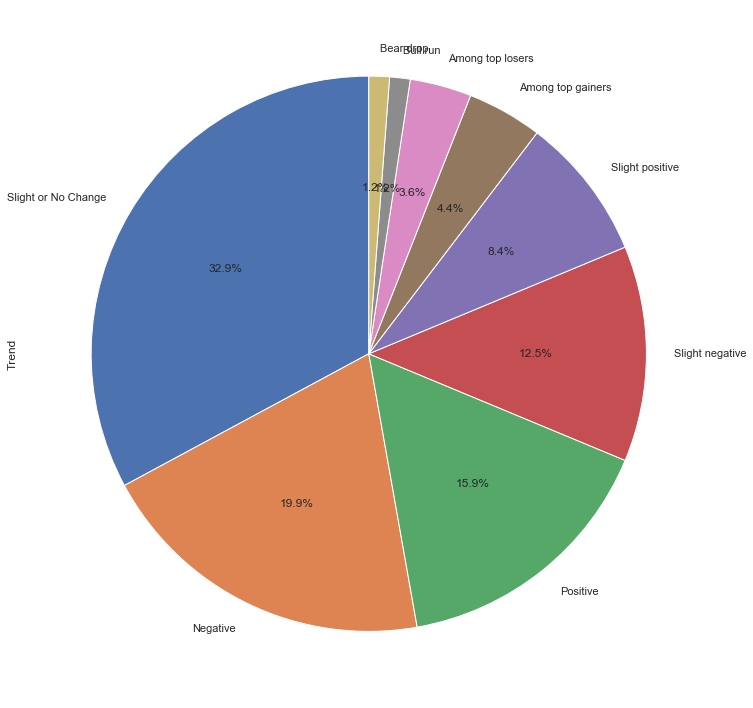

In [115]:
plt.figure(figsize=(30, 10))
df['Trend'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

The above plot is a pie chart that shows the percentage of each type of trend in the stocks. The trend constituting the highest percentage is the slight or no change in the daily returns of the stock indicating that the stock is non volatile. 

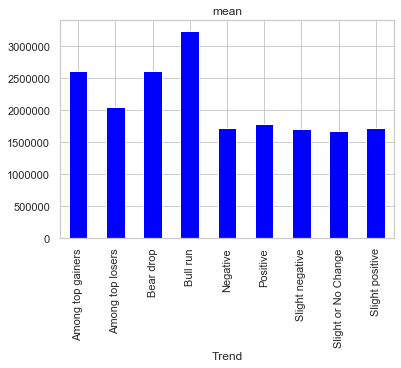

In [116]:
df['Total Traded Quantity'].groupby(df.Trend, group_keys=False).mean().plot(kind='bar', color = 'blue', label='mean')
plt.title('mean')
plt.show()

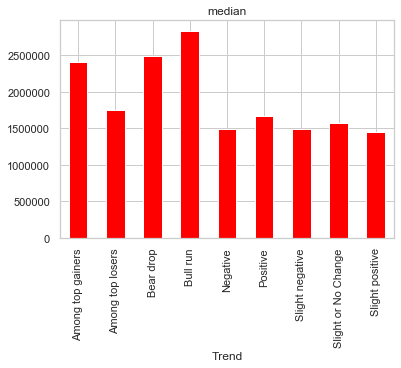

In [117]:
df['Total Traded Quantity'].groupby(df.Trend, group_keys=False).median().plot(kind='bar', color='red', label='median')
plt.title('median')
plt.show()

The above plots are bar graphs. It plots the mean and median respectively of the total traded quantity of the stock grouped by the trend it follows.

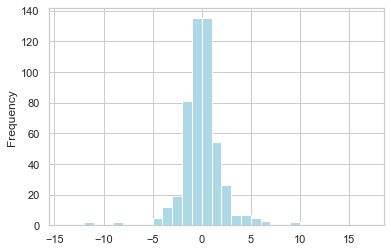

In [118]:
mini = df['Day_Perc_Change'].min().round().astype('int64')
maxi = df['Day_Perc_Change'].max().round().astype('int64')
df['Day_Perc_Change'].plot(kind = 'hist', bins=range(mini, maxi), color='lightblue')
plt.show()

The above plot is a histogram which plots the daily returns of the stock.

In [119]:
result = df['Day_Perc_Change'].rolling(7).std()
nifty = pd.read_csv('Nifty50.csv')
nifty.Date = nifty.Date.astype('datetime64')
nifty = nifty.set_index('Date')
nifty['Perc_Change'] = nifty['Close'].pct_change()*100
result2 = nifty['Perc_Change'].rolling(7).std()

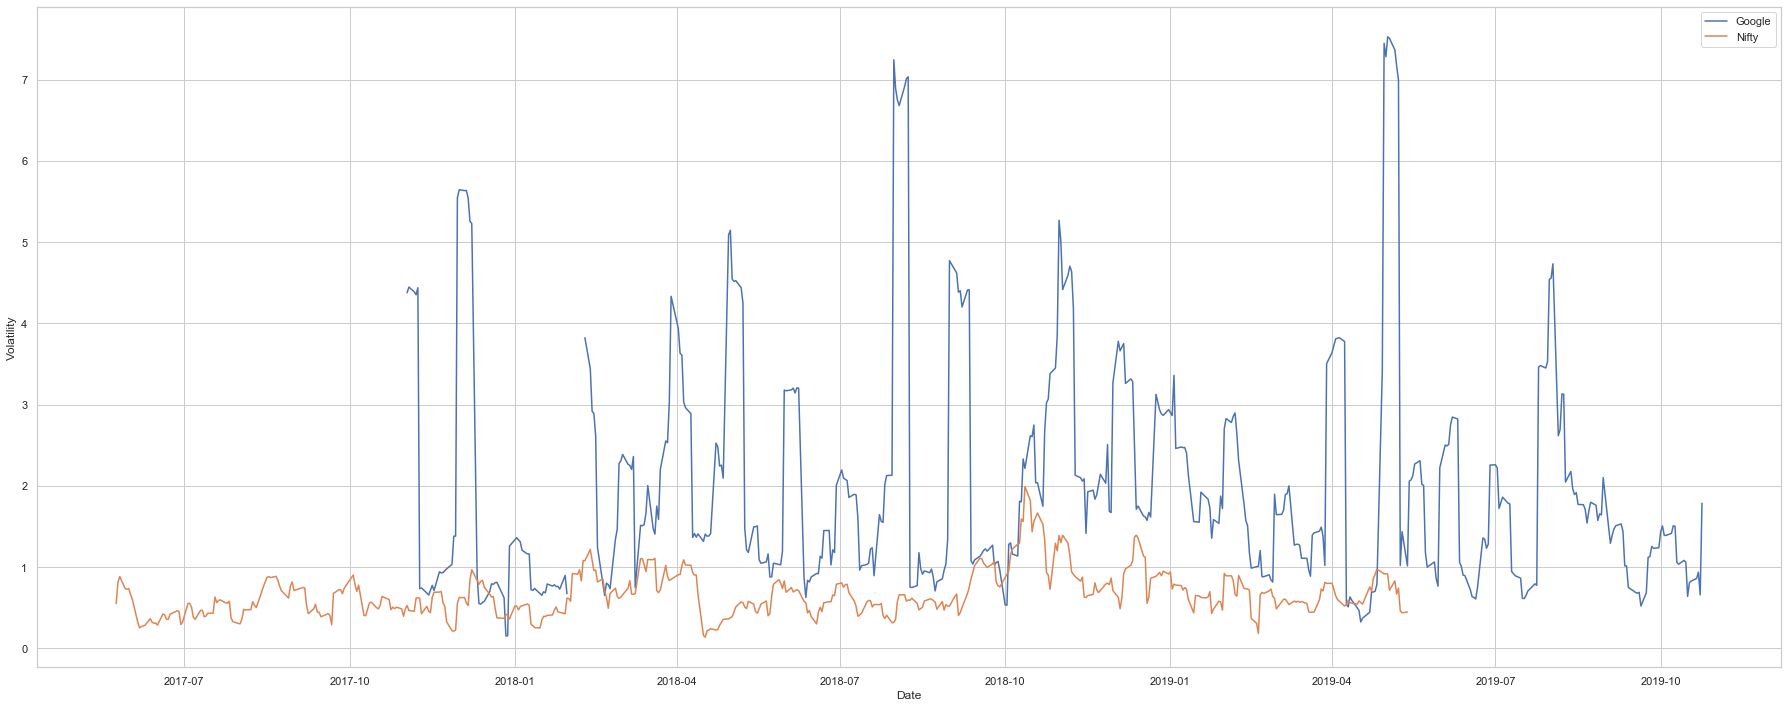

In [120]:
x = df.index
y = np.array(result)
x2 = nifty.index
y2 = np.array(result2)
plt.figure(figsize=(25, 10))
plt.plot(x, y, label='Google')
plt.plot(x2, y2, label='Nifty')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

The above plot is volatility vs time plot.
<br> **Volatility** is the change in variance in the returns of the stock over a specific period of time. If the stock market falls or rises more than 1% over a sustained period of time it is called a volatile market. 
<br> To analyze the volatility of a stock, a general trend of the market is needed. The **NIFTY 50** index is National Stock Exchange of India's benchmark broad based stock market index for the Indian equity market. NIFTY 50 stands for National Index Fifty, and represents the weighted average of 50 Indian company stocks in 17 sectors. NIFTY 50 provides the general trend of the stock market along which the volatility of a stock is analyzed. 
<br> To calculate the Volatility : First the 7 day rolling average also called moving average of the daily returns is calculated using rolling function provided by the pandas library. Then the standard deviation of the whole is calculated. 
<br> If a stock is volatile, it means it is riskier to invest in them but one can expect high returns from them.

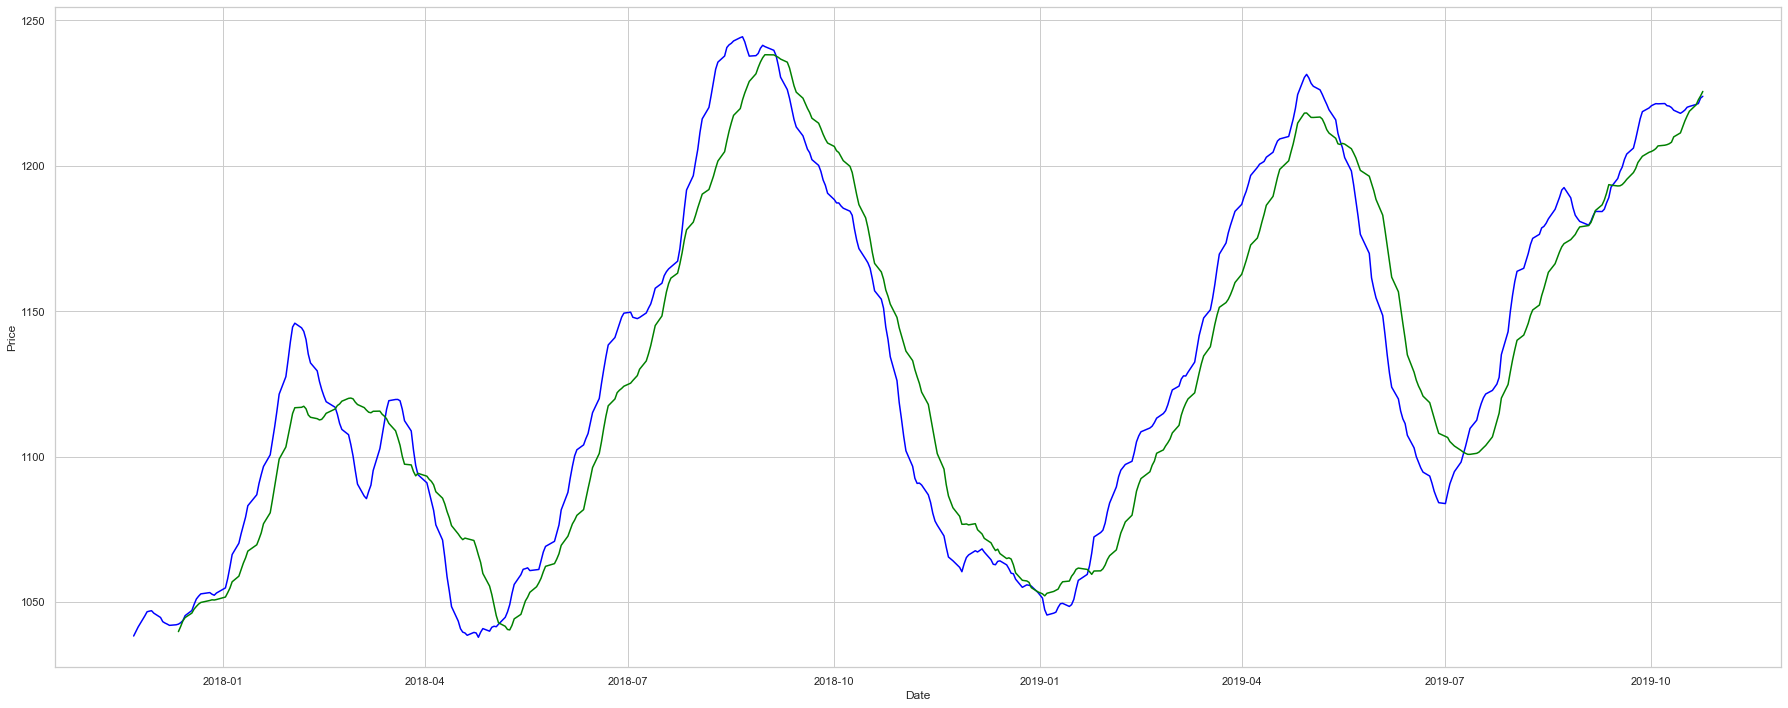

In [121]:
plt.figure(figsize=(25, 10))
plt.plot(df.index, df['Close Price'].rolling(21).mean(), label = '21_SMA', color='blue')
plt.plot(df.index, df['Close Price'].rolling(34).mean(), label = '34_SMA', color='green')
plt.ylabel('Price')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

The above plot plots the 21 day moving average and 34 day moving average. The rolling mean of the closing price is calculated for 21 and 34 days respectively. 
<br> It is a common strategy used in finance to make the call. If the smaller moving average that is the 21 moving average crosses over the longer moving average i.e. the 34 moving average then the call is to **buy** the stock otherwise the call is to **sell** the stock.

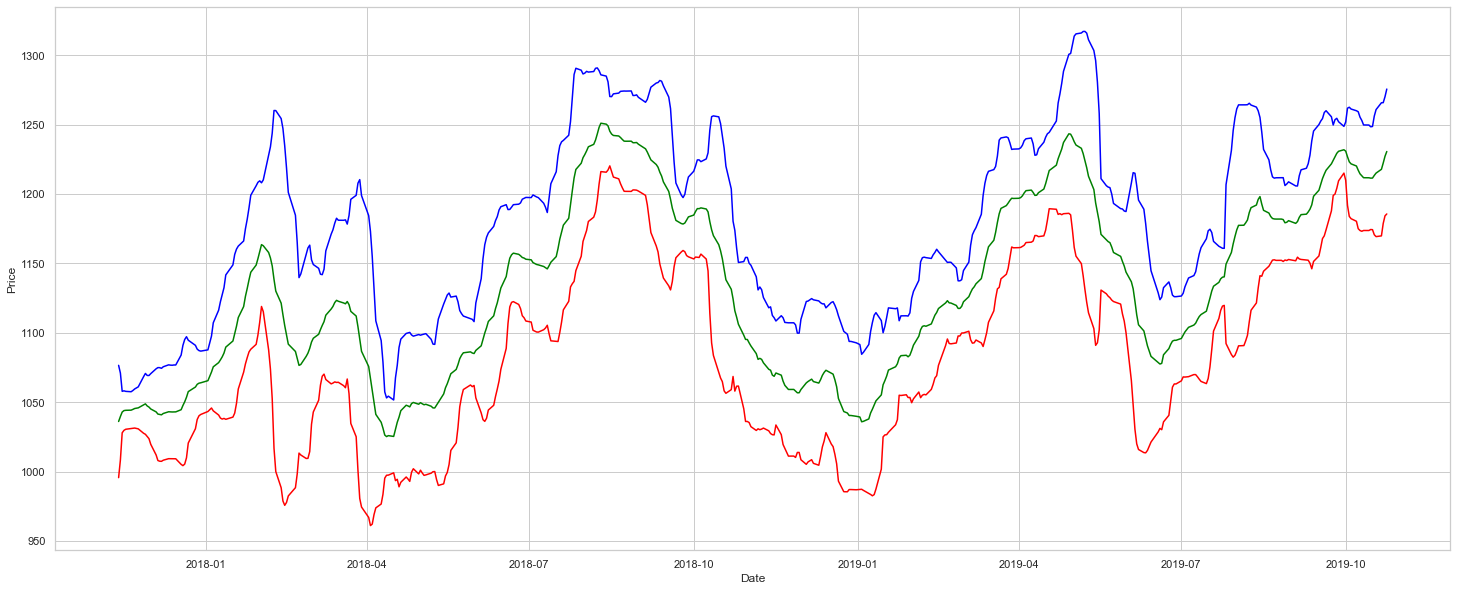

In [122]:
rm = df['Close Price'].rolling(14).mean()
rstd = df['Close Price'].rolling(14).std()
upper_band = rm + (rstd * 2)
lower_band = rm - (rstd * 2)
plt.figure(figsize=(25, 10))
plt.plot(df.index, rm, color='green')
plt.plot(df.index, upper_band, color='blue')
plt.plot(df.index, lower_band, color='red')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

The above plot is of Bollinger Bands. **Bollinger Bands** are a type of statistical chart characterizing the prices and volatility over time.
<br> It consists of 3 bands :- 1. **14 day rolling/moving average (green band)**
<br> 2. **Upper Band (blue band)** - Calculated using the addition of 2 times the standard deviation of the 14 day rolling standard deviation from the 14 day rolling mean.
<br> 3. **Lower Band (red band)** - Calculated using the subtraction of 2 times the standard deviation of the 14 day rolling standard deviation from the 14 day rolling mean.
<br> If the 14 day rolling average is closer to upper band it indicates that the stock is **overbought** whereas if it closer to lower band it indicates that the stock is **oversold**.

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm 
from statsmodels.regression.linear_model import OLS

In this part, the OHLC prices of gold along with total volume traded is loaded. It contains two columns - Pred and New where Pred column is incomplete. The dataset is divided into two parts - training and testing. Using linear regression, rest of the values of the pred column are predicted by fitting the model to the training set. The independent variables are the OHLC prices. Similarly, using Polynomial regression, the model is fitted to the training set for the target variable new. 

In [124]:
gold = pd.read_csv('GOLD.csv')
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [125]:
train = gold.iloc[0:411,:]
x_train, y_train = train.loc[:,'Price':'Low'], train['Pred']
test = gold.iloc[411:512,:]
x_test, y_test = test.loc[:,'Price':'Low'], test['Pred']

In [126]:
reg =LinearRegression().fit(x_train, y_train)

In [127]:
reg.coef_

array([ 2.,  3., -1., -4.])

In [128]:
reg.score(x_train, y_train)

1.0

In [129]:
y_test = reg.predict(x_test)
y_test = pd.Series(y_test)
pred = pd.concat([y_train, y_test], ignore_index=True)
df['Pred'] = pred

In [130]:
gold.iloc[0:411,:]

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
407,"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
408,"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186
409,"Dec 07, 2018",31440,31011,31480,30941,11.24K,1.40%,669.0,976.692705


In [131]:
gold.iloc[411:512,:]

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [132]:
new_x = gold.loc[:, 'Price':'Low']
new_y = gold['new']
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.2)

In [133]:
new_reg =LinearRegression().fit(new_x_train, new_y_train )

In [134]:
new_reg.coef_

array([ 1.01067809, -1.00180578,  1.00659499, -1.01553303])

In [135]:
new_pred = new_reg.predict(new_x_test)
new_pred

array([ 241.42013668,  193.55257213,   48.81773654,  255.73781664,
        129.39871943,   89.27828266,  119.74410286,  280.48701434,
        395.0369043 ,  200.67760975,   74.43901873,  111.92558332,
        673.36584905,  476.52960798,  249.09560493,  918.46597058,
        179.43245745,   98.88706248,  155.99797891,  131.05376631,
        150.41879159,  156.24426533,  279.13080115,   25.45235172,
        295.7911256 ,  143.59540207,  134.60660979,  430.40782027,
        753.08359188,  307.31324866,  163.17129332,  390.71388808,
        138.84396932,   67.17856723,  203.34422725,  247.39322308,
        724.1358952 ,  410.46299402,  164.42209407,  149.22134575,
        312.38144792,  321.17974082,  359.56255205,  199.49544266,
        415.75013839,  254.65581722,  320.63323007,  167.85882148,
         24.38060166,  243.60854728,  179.75047563,  294.68820647,
        135.59475741,  104.38892364,   13.39460409,  125.55704348,
        112.89329296,   99.80963114,  156.11875234,  280.44631

In [136]:
mse = mean_squared_error(new_y_test, new_pred)
mse

1.3824926274747578

In [137]:
r2 = new_reg.score(new_x_train, new_y_train)
r2

0.9999935005336771

In [138]:
poly = PolynomialFeatures(2)
new_x_train_poly = poly.fit_transform(new_x_train)
poly_reg = LinearRegression().fit(new_x_train_poly, new_y_train)
improved_r2 = poly_reg.score(new_x_train_poly, new_y_train)
improved_r2

0.999999994942678

In this part, the OLS regression is applied on the google and nifty 50 stocks. In statistics, **ordinary least squares (OLS)** is a type of linear least squares method for estimating the unknown parameters in a linear regression model. It gives the beta value of a stock. **Beta value** of an asset is a measure of sensitivity of its returns relative to a market benchmark (nifty 50). High beta corresponds to high risk but ofter high returns. 

In [140]:
prices = pd.concat([df['Close Price'], nifty['Close']], axis = 1)
prices.columns = ['Google', 'Nifty50']
daily_returns = prices.pct_change().dropna(axis=0)
daily_returns.head()

,Google,Nifty50
Date,,
2017-10-26,-0.000040,0.004706
2017-10-27,0.042616,-0.002006
2017-10-30,-0.000522,0.003933
2017-10-31,-0.000087,-0.002736
2017-11-01,0.009254,0.010179


In [141]:
x = daily_returns['Nifty50']
y = daily_returns['Google']
x1 = sm.add_constant(x)

model = OLS(y, x1)
model.fit().summary()

C:\Users\vividha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Google   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.775
Date:                Wed, 15 Jul 2020   Prob (F-statistic):            0.00951
Time:                        22:30:14   Log-Likelihood:                 1390.3
No. Observations:                 514   AIC:                            -2777.
Df Residuals:                     512   BIC:                            -2768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.765      0.444      -0.001       0.002
Nifty50        0.2857      0.110      2.603      0.010       0.070       0.501
==============================================================================
Omnibus:                       60.061   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.990
Skew:                          -0.132   Prob(JB):                     5.18e-93
Kurtosis:                       7.447   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Daily Beta value for past 3 months = 0.2857
<br> The beta values are less than 1 and are low that means that stocks of google are less risky. The price is steadier as compared to other stocks in the market. 
<br> If the Beta values were negative, it would indicate an inverse relation to the market that is they would do good if general trend of market falls.

In [143]:
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [144]:
df['Volatility'] = df['Close Price'].pct_change().rolling(7).std()
df.tail()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,vwap,Day_Perc_Change,Trend,Pred,Volatility
Date,,,,,,,,,,,,
2019-10-18,1244.41,"1,254.69","1,258.11","1,240.14",1580000,10,2019,1.215410e+06,0.010448,Slight or No Change,NaN,0.008205
2019-10-21,1244.28,"1,248.70","1,253.51","1,239.99",1030000,10,2019,1.124710e+06,0.248147,Slight or No Change,NaN,0.008401
2019-10-22,1241.20,"1,244.48","1,248.73","1,239.85",1280000,10,2019,1.156070e+06,-1.306426,Negative,NaN,0.008728
2019-10-23,1257.63,"1,240.21","1,258.04","1,240.21",1180000,10,2019,1.094950e+06,-0.117543,Slight or No Change,NaN,0.009497
2019-10-24,1259.11,"1,259.11","1,262.90","1,252.35",1010000,10,2019,1.010000e+06,4.185250,Among top gainers,NaN,0.006628


In [145]:
df["14 day SMA"] = df['Close Price'].rolling(14).mean()
df["14 day STD"] = df['Close Price'].rolling(14).std()
df["bollinger upper band"] = df["14 day SMA"] + df["14 day STD"]*2
df["bollinger lower band"] = df["14 day SMA"] - df["14 day STD"]*2
df.tail()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,vwap,Day_Perc_Change,Trend,Pred,Volatility,14 day SMA,14 day STD,bollinger upper band,bollinger lower band
Date,,,,,,,,,,,,,,,,
2019-10-18,1244.41,"1,254.69","1,258.11","1,240.14",1580000,10,2019,1.215410e+06,0.010448,Slight or No Change,NaN,0.008205,1215.035000,22.883415,1260.801830,1169.268170
2019-10-21,1244.28,"1,248.70","1,253.51","1,239.99",1030000,10,2019,1.124710e+06,0.248147,Slight or No Change,NaN,0.008401,1217.769286,23.981450,1265.732185,1169.806386
2019-10-22,1241.20,"1,244.48","1,248.73","1,239.85",1280000,10,2019,1.156070e+06,-1.306426,Negative,NaN,0.008728,1222.289286,21.752871,1265.795028,1178.783543
2019-10-23,1257.63,"1,240.21","1,258.04","1,240.21",1180000,10,2019,1.094950e+06,-0.117543,Slight or No Change,NaN,0.009497,1227.160714,21.462737,1270.086189,1184.235239
2019-10-24,1259.11,"1,259.11","1,262.90","1,252.35",1010000,10,2019,1.010000e+06,4.185250,Among top gainers,NaN,0.006628,1230.600000,22.499796,1275.599591,1185.600409


The below call function makes a call based on the bollinger bands and closing price of the stock.
<br> If the closing price is less than or equal to the lower bollinger band, then the call is to **buy**
<br> If the closing price is more than or equal to the upper bollinger band, then the call is to **short**
<br> If the closing price is between the lower bollinger band and 14 moving average, then the call is to **Hold Buy/Liquidate Short**
<br> If the closing price is between the upper bollinger band and 14 moving average, then the call is to **Hold Short/Liquidate Buy**

In [146]:
def call(df): 
    if df['Close Price'] <= df["bollinger lower band"]:
        return 'Buy'
    elif df['Close Price'] >= df["bollinger upper band"]:
        return 'Short'
    elif df['Close Price'] > df["bollinger lower band"] and df['Close Price'] < df['14 day SMA']:
        return 'Hold Buy/ Liquidate Short'
    elif df['Close Price'] < df["bollinger upper band"] and df['Close Price'] > df['14 day SMA']:
        return 'Hold Short/ Liquidate Buy'
df['Call'] =  df.apply(call, axis = 1)
df['Call'].value_counts()

Hold Short/ Liquidate Buy    257
Hold Buy/ Liquidate Short    193
Short                         25
Buy                           15
Name: Call, dtype: int64

Based on the 4 parameters i.e. Closing price and 3 bollinger bands - a classification model is trained to predict the call the future stocks.

In [147]:
scaler = StandardScaler()
X = df[['Close Price', '14 day SMA', 'bollinger lower band', 'bollinger upper band']]
Y = df['Call'].dropna()
X = X.dropna()
X = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 0)
features = len(df['Call'].unique())

In [148]:
classifiers = OrderedDict([
    ( "KNN", KNeighborsClassifier(features) ),
    ( "SVM",        SVC(kernel="linear", C=0.025) ),
    ( "Decision Tree",     DecisionTreeClassifier(max_depth=5) ),
    ( "Neural Net",        MLPClassifier(alpha=1, max_iter=1000) ),
    ( "Naive Bayes",       GaussianNB() ),
])

In [149]:
r2scores = {}
for (name, classifier) in classifiers.items():
  classifier.fit(xtrain, ytrain)
  r2scores[name] = classifier.score(xtest, ytest)
    
r2scores = OrderedDict(sorted(r2scores.items(), key=lambda x: x[1]))
r2scores

OrderedDict([('Naive Bayes', 0.5238095238095238),
             ('SVM', 0.6530612244897959),
             ('Decision Tree', 0.7142857142857143),
             ('KNN', 0.8027210884353742),
             ('Neural Net', 0.9319727891156463)])

As the Neural Net gives the highest r2 score i.e. highest accurate prediction, it is selected as the classification model to predict the call for following TCS stock.

In [150]:
Tcs = pd.read_csv('TCS.csv')
Tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [151]:
Tcs['Date'] = Tcs['Date'].astype('datetime64')
Tcs = Tcs[Tcs.Series == 'EQ']
Tcs.set_index('Date', inplace = True)

In [152]:
Tcs["14 day SMA"] = Tcs['Close Price'].rolling(14).mean()
Tcs["14 day STD"] = Tcs['Close Price'].rolling(14).std()
Tcs["bollinger upper band"] = Tcs["14 day SMA"] + Tcs["14 day STD"]*2
Tcs["bollinger lower band"] = Tcs["14 day SMA"] - Tcs["14 day STD"]*2
Tcs = Tcs.dropna()

In [153]:
Tcs_xtrain = Tcs[['Close Price', '14 day SMA', 'bollinger upper band', 'bollinger lower band']]
Tcs_xtrain = scaler.fit_transform(Tcs_xtrain)
Tcs['Call'] = classifiers['Neural Net'].predict(Tcs_xtrain)
Tcs

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 day SMA,14 day STD,bollinger upper band,bollinger lower band,Call
Date,,,,,,,,,,,,,,,,,,,
2017-06-01,TCS,EQ,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,Hold Short/ Liquidate Buy
2017-06-02,TCS,EQ,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,Hold Short/ Liquidate Buy
2017-06-05,TCS,EQ,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,Hold Short/ Liquidate Buy
2017-06-06,TCS,EQ,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,Hold Short/ Liquidate Buy
2017-06-07,TCS,EQ,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,Hold Short/ Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263,Hold Buy/ Liquidate Short
2019-05-08,TCS,EQ,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115,Hold Buy/ Liquidate Short
2019-05-09,TCS,EQ,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600,Hold Buy/ Liquidate Short


In the google stock, the calls were made manually that is the conditions were hand-coded but in case of TCS stocks, the calls are predicted using the classification model, taking the same parameters of closing price and bollinger bands.

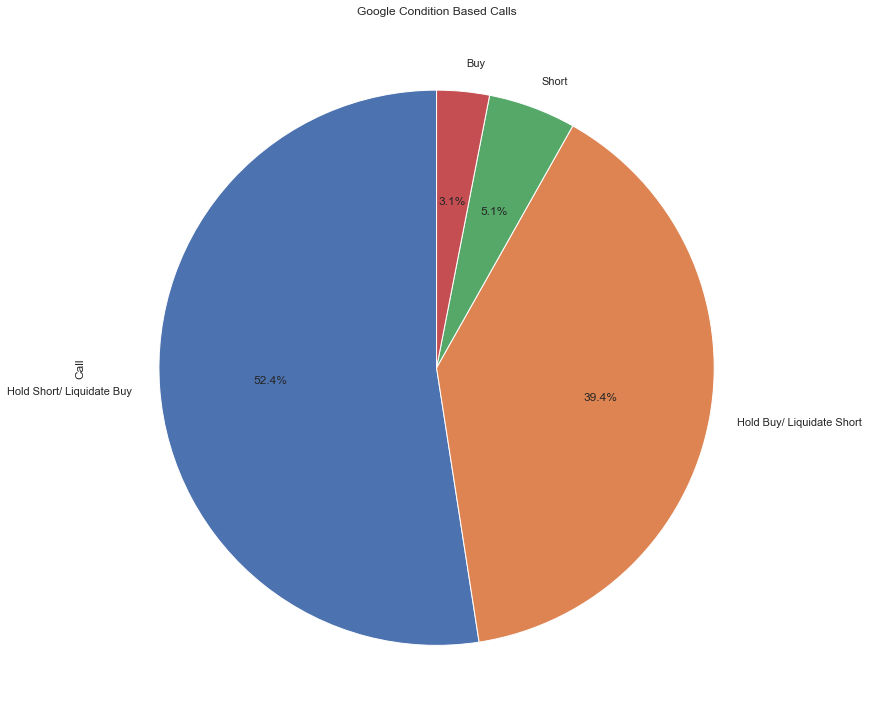

In [160]:
plt.figure(figsize=(30, 10))
df['Call'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.title('Google Condition Based Calls')
plt.show()

The above piechart shows the percentage of different calls for google stocks. Hold Short or Liquidate Buy holds the maximum percentage whereas the call to Buy has the least percentage in the stocks.

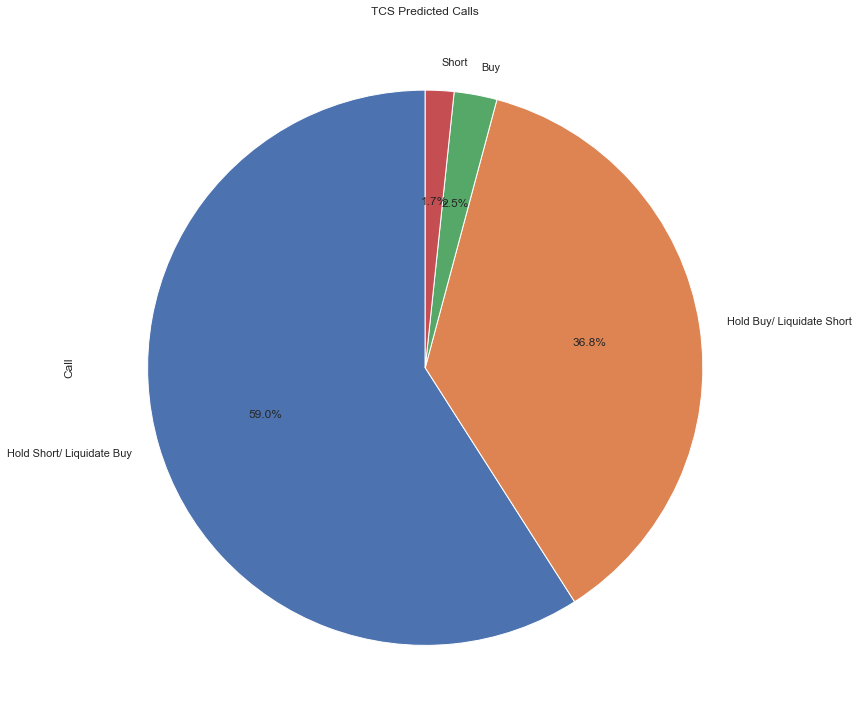

In [158]:
plt.figure(figsize=(30, 10))
Tcs['Call'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.title('TCS Predicted Calls')
plt.show()

The above pie chart is of the calls that are made using the classification model. It is seen that the call to Hold Short or Liquidate Buy constitutes the highest percentage whereas the call to short constitutes the lowest percentage. 
<br> In case of the stocks of Google the least percentage was the call to buy whereas in the stocks of TCS the least percentage is the call to short.